In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Ignore SQLITE warnings related to Decimal numbers in the database
import warnings
warnings.filterwarnings('ignore')

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
connection = engine.connect()

In [6]:
# Query Required Tables in the the Database
# data = engine.execute("SELECT * FROM measurement")
# for record in data:
#     print(record)

In [7]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
Station
Measurement


sqlalchemy.ext.automap.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [16]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Measurement = Base.classes.measurement
stmt=session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-09-01').\
    order_by(Measurement.date.desc()).all()
stmt


[(0.0, '2017-08-23'),
 (0.0, '2017-08-23'),
 (0.08, '2017-08-23'),
 (0.45, '2017-08-23'),
 (0.0, '2017-08-22'),
 (0.0, '2017-08-22'),
 (0.5, '2017-08-22'),
 (0.0, '2017-08-21'),
 (0.02, '2017-08-21'),
 (None, '2017-08-21'),
 (0.56, '2017-08-21'),
 (0.0, '2017-08-20'),
 (0.01, '2017-08-20'),
 (None, '2017-08-20'),
 (0.0, '2017-08-19'),
 (0.0, '2017-08-19'),
 (None, '2017-08-19'),
 (0.09, '2017-08-19'),
 (0.0, '2017-08-18'),
 (0.0, '2017-08-18'),
 (0.06, '2017-08-18'),
 (None, '2017-08-18'),
 (0.0, '2017-08-17'),
 (0.05, '2017-08-17'),
 (0.01, '2017-08-17'),
 (0.13, '2017-08-17'),
 (0.0, '2017-08-16'),
 (0.07, '2017-08-16'),
 (0.12, '2017-08-16'),
 (0.42, '2017-08-16'),
 (0.02, '2017-08-15'),
 (0.0, '2017-08-15'),
 (0.06, '2017-08-15'),
 (0.32, '2017-08-15'),
 (0.42, '2017-08-15'),
 (0.0, '2017-08-14'),
 (0.01, '2017-08-14'),
 (0.08, '2017-08-14'),
 (0.0, '2017-08-14'),
 (0.22, '2017-08-14'),
 (0.0, '2017-08-13'),
 (None, '2017-08-13'),
 (0.0, '2017-08-13'),
 (0.0, '2017-08-13'),
 (None,

In [18]:
# Load the results into a pandas dataframe. Set the index to the `Measurement.date`
# YOUR CODE HERE
df = pd.DataFrame(stmt, columns=['Measurement.prcp', 'Measurement.date'])
df.set_index('Measurement.date', inplace=True, )
df.head(10)


,Measurement.prcp
Measurement.date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


Text(0, 0.5, 'Precipitation')

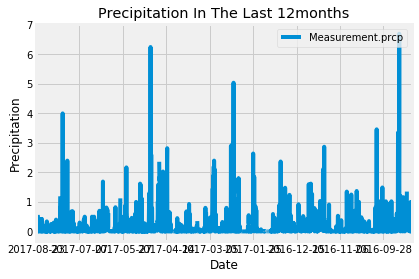

In [19]:
df.plot.line()
plt.legend(loc="upper right")
plt.title("Precipitation In The Last 12months")
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Measurement = pd.read_sql('select * from Measurement', connection)
Measurement.prcp.describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [21]:
# Design a query to show how many stations are available in this dataset?
# Create a session
session = Session(engine)
# Total Stations
session.query(func.count(Station.station)).all()


[(9)]

In [22]:
#session.query(Measurement.station).distinct().all()
# data = engine.execute("SELECT station, COUNT (station) FROM measurement GROUP BY station ORDER BY 'count' DESC")
# for record in data:
#     print(record)

In [23]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
inspector = inspect(engine)
inspector.get_table_names()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).order_by(Measurement.tobs).first()
lowest_temp


('USC00511918', 53.0)

In [26]:
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).order_by(Measurement.tobs).first()
highest_temp

('USC00519397', 87.0)

In [27]:
#Average temperature of most active station
session.query(Measurement.station, func.count(Measurement.tobs), func.avg(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()

('USC00519281', 2772, 71.66378066378067)

In [28]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
Measurement = Base.classes.measurement
stmt1=session.query(Measurement.station, func.count(Measurement.tobs)).\
    filter(Measurement.date > '2016-09-01').\
    order_by(func.count(Measurement.date).desc()).all()
stmt1

[('USC00519397', 2165)]

In [29]:
# Choose the station with the highest number of temperature observations.
Measurement = Base.classes.measurement
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()

('USC00519281', 2772)

In [30]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Measurement = Base.classes.measurement
stmt2=session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > '2016-09-01').\
    filter(Measurement.station == 'USC00519281').all()
stmt2


[('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 76.0),
 ('USC00519281', 73.0),
 ('USC00519281', 72.0),
 ('USC00519281', 71.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [31]:
# Load the results into a pandas dataframe. Set the index to the `Measurement.date`
# YOUR CODE HERE
df = pd.DataFrame(stmt2, columns=['Measurement.station', 'Measurement.tobs'])
df.head(10)



,Measurement.station,Measurement.tobs
0,USC00519281,80.0
1,USC00519281,78.0
2,USC00519281,78.0
3,USC00519281,78.0
4,USC00519281,73.0
5,USC00519281,74.0
6,USC00519281,80.0
7,USC00519281,79.0
8,USC00519281,77.0
9,USC00519281,80.0


Text(0, 0.5, 'Frequency')

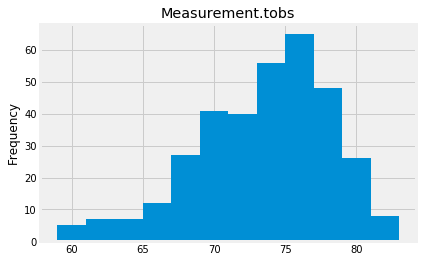

In [32]:
hist = df.hist(bins=12)
plt.ylabel("Frequency")